# Lab 4.1: Likelihood

One way to estimate parameters for a distribution is to calculate the likelihood of the parameter values given the data that we observe.

The likelihood of a parameter $\theta$ is given by the notion $\mathcal{L}(\theta)$ which has the same/similar form as the probability function $p(data \mid \theta)$.

### Question 1

The file `outage.csv` contains the number of power outages Kampala (Ugandan city) experiences each month for the past 72 months

1. Read in the `https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv` using pandas
2. Plot the data on a histogram 
  - Set `normed=True` to get the probability density histogram
  - Set `bins=20` to get smaller bins for the histogram

3.  What distribution would you consider fitting the data to given the nature of the data ?
  - Think about if the data is discrete or continuous 
  - Think about what the data describes

4. Write down the equation that would model the random variable in question with the distribution you have chosen

   For example:
   - $\text{Let X be the number of heads in 5 coin flips}$
   - $X \sim Binomial(n, p)$

5. Write down the likelihood function to calculate the likelihood of a given parameter value 

   **Hint**:
   - A **parameter** of the binomial distribution will be `n` or `p` for example
   - This will be based on the distribution you have chosen above
   - The likelihood function would be the product of the probabilities for each data point 
  
6. Write a python function that will calculate the likelihood of a parameter given the data
   - The function will take a parameter and the data
   - Use `scipy.stats` and `numpy.product()`
 
7. Define a range of possible values for the parameter from `14` to `21` (using `numpy.linspace`).

   Calculate the likelihood for each of the values defined in the range.
   
   Plot the values ($x$) against the likelihood ($L(\theta)$)  

8. Write a function to calculate the log-likelihood.

9. Find the maximum likelihood estimate for the parameter of interest (use `numpy.argmax`)

In [1]:
%pylab inline
import pandas as pd
import numpy as np

outages = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv')

Populating the interactive namespace from numpy and matplotlib


In [4]:
outages.describe()


,0
count,72.000000
mean,19.236111
std,4.015789
min,11.000000
25%,16.000000
50%,19.000000
75%,21.000000
max,30.000000


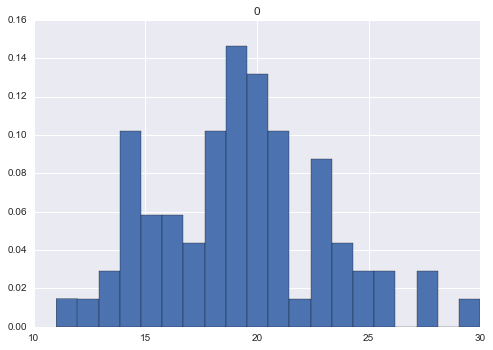

In [16]:
outages.hist(bins=20, normed=True);

Question 1.3:

We think this is a Poisson distribution because it is a distribution of discrete events ocurring over a fixed time interval of months.

Question 1.4:

Let $x$ represent the number of outages per month. And the estimated rate per month is $\lambda$ = 19

$N_x \sim Poisson(\lambda x)$; so $P(X = k) = \frac{(\lambda)^k}{k!}e^{-\lambda}$

Question 1.5:

Likelihood function: 

$P(X = k) = \frac{(\lambda)^k}{k!}e^{-\lambda}$

# Question 1.6:

In [191]:
from scipy.stats import poisson, lognorm, norm


In [178]:
def likelihood_func(data, mu):
    return np.prod([poisson.pmf(x, mu) for x in data.ix[:,0]])

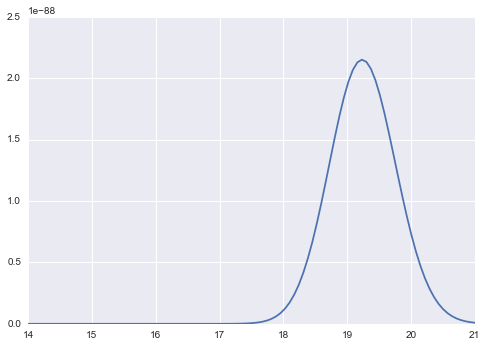

In [179]:
p = linspace(14, 21, 100)
p_Lhoods = []
for lamb in p:
    p_Lhoods.append(likelihood_func(outages, lamb))
plot(p, p_Lhoods);

In [173]:
def log_likelihood(data, mu):
    return np.sum(log([poisson.pmf(x, mu) for x in data.ix[:,0]]))

MLE is 19.2323232323 -201.861229847


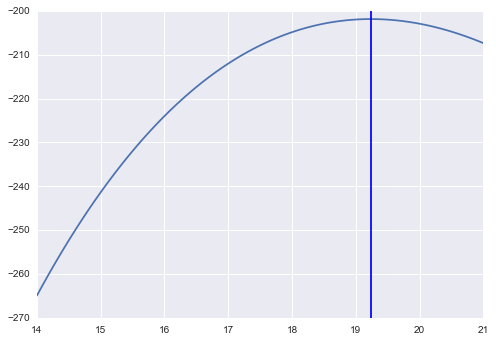

In [209]:
q = linspace(14, 21, 100)
l_Lhoods = []
for lamb in q:
    l_Lhoods.append(log_likelihood(outages, lamb))
plot(q, l_Lhoods)

max_index = argmax(l_Lhoods)
axvline(x = q[max_index])

print("MLE is", q[max_index], l_Lhoods[max_index])

### Question 2

The file `plants.csv` contains heights to 1,000 plants. You are told the data resembles a normal distribution with a standard deviation of 3cm.

1. Read in `https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv` using pandas and plot the data on a histogram
   
2. Define a range of possible values for the mean (from 32 to 42)
  
3. Calculate the log-liklihood for each of the values in the range 
  
4. Plot the log-likelihood function

5. Find the MLE for the mean

In [180]:
plants = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv')

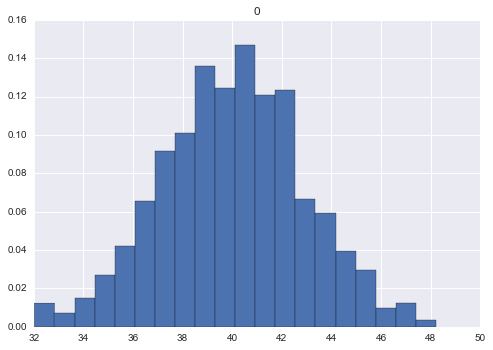

In [181]:
plants.hist(bins=20, normed=True);

In [183]:
plantvals = linspace(32, 42, 100)

In [206]:
def p_log_likelihood_func(data, mu):
    return np.sum(log(norm.pdf(data, mu, 3)))

MLE is 39.9797979798 -2475.83435632


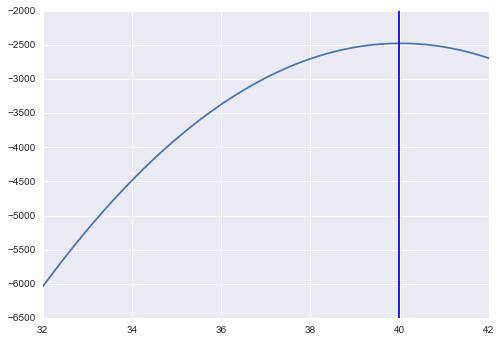

In [208]:
plantvals = linspace(32, 42, 100)
plantlogs = []
for lamb in plantvals:
    plantlogs.append(p_log_likelihood_func(plants, lamb))
plot(plantvals, plantlogs)

max_index = argmax(plantlogs)
axvline(x = plantvals[max_index])

print("MLE is", plantvals[max_index], plantlogs[max_index])